In [24]:
import geopandas as gpd
import shapely
import seaborn
import math
import matplotlib.pyplot as plt
import libpysal as ps
import numpy as np
from datetime import datetime
import time

In [25]:
geodata = gpd.read_file('./datasets/example_dataset.geojson')

In [26]:
# 14
dates = [datetime.strptime(dateStr, '%Y-%m-%d').date() for dateStr in geodata['sowing_date']]
count = sum(1 for date in dates if date.month != 4)
print(f'Fields number: {count}')

Fields number: 421


In [27]:
# 15
geodata['relative_error'] = abs((geodata['actual_yield'] - geodata['model_yield']) / geodata['actual_yield'])
geodata.head(5)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",0.171447
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",0.115696
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",0.052785
3,maiz,2016-04-12,9000.0,MS_VN_03_410,11.756031,588.947718,8878.0,"MULTIPOLYGON (((28.11488 49.21303, 28.11503 49...",0.013556
4,maiz,2016-04-12,12100.0,KI_VN_10_0308,11.584644,595.795305,8996.0,"MULTIPOLYGON (((28.86633 49.22147, 28.86651 49...",0.256529


In [28]:
# 16
min_relative_error_idx = geodata['relative_error'].idxmin()
max_relative_error_idx = geodata['relative_error'].idxmax()

min_relative_error_field_info = geodata.loc[min_relative_error_idx]
max_relative_error_field_info = geodata.loc[max_relative_error_idx]

print('Field with minimum relative_error value:', min_relative_error_field_info)
print('Field with maximum relative_error value:', max_relative_error_field_info)



Field with minimum relative_error value: crop_name                                                        soy
sowing_date                                               2018-05-09
actual_yield                                                  2600.0
field_id                                               KI_VN_10_0702
avg_temperature                                            13.084752
avg_rainfall                                              633.554513
model_yield                                                   2603.0
geometry           MULTIPOLYGON (((28.697984661201634 49.34165148...
relative_error                                              0.001154
Name: 991, dtype: object
Field with maximum relative_error value: crop_name                                                       maiz
sowing_date                                               2017-04-28
actual_yield                                                  1500.0
field_id                                                KI_VN_08_

In [29]:
# 17
geodata['centroid'] = geodata['geometry'].centroid
geodata['centroid'] = geodata['centroid'].to_crs(epsg=4326)
geodata['centroid'] = geodata['centroid'].apply(lambda x: f'POINT({x.x}, {x.y})')
geodata.head(5)

C:\Users\anton\AppData\Local\Temp\ipykernel_18712\30242764.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodata['centroid'] = geodata['geometry'].centroid


,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error,centroid
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",0.171447,"POINT(28.163550050982856, 49.21292290278466)"
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",0.115696,"POINT(28.159578591149135, 49.20347653068863)"
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",0.052785,"POINT(27.299554944355855, 48.87374976936321)"
3,maiz,2016-04-12,9000.0,MS_VN_03_410,11.756031,588.947718,8878.0,"MULTIPOLYGON (((28.11488 49.21303, 28.11503 49...",0.013556,"POINT(28.12310887255463, 49.20752409227187)"
4,maiz,2016-04-12,12100.0,KI_VN_10_0308,11.584644,595.795305,8996.0,"MULTIPOLYGON (((28.86633 49.22147, 28.86651 49...",0.256529,"POINT(28.854733538870974, 49.21875059008936)"


In [30]:
# 18
geodata['area'] = geodata.area
geodata.head(5)

C:\Users\anton\AppData\Local\Temp\ipykernel_18712\1959361755.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodata['area'] = geodata.area


,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error,centroid,area
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",0.171447,"POINT(28.163550050982856, 49.21292290278466)",0.000039
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",0.115696,"POINT(28.159578591149135, 49.20347653068863)",0.000265
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",0.052785,"POINT(27.299554944355855, 48.87374976936321)",0.000027
3,maiz,2016-04-12,9000.0,MS_VN_03_410,11.756031,588.947718,8878.0,"MULTIPOLYGON (((28.11488 49.21303, 28.11503 49...",0.013556,"POINT(28.12310887255463, 49.20752409227187)",0.000077
4,maiz,2016-04-12,12100.0,KI_VN_10_0308,11.584644,595.795305,8996.0,"MULTIPOLYGON (((28.86633 49.22147, 28.86651 49...",0.256529,"POINT(28.854733538870974, 49.21875059008936)",0.000148


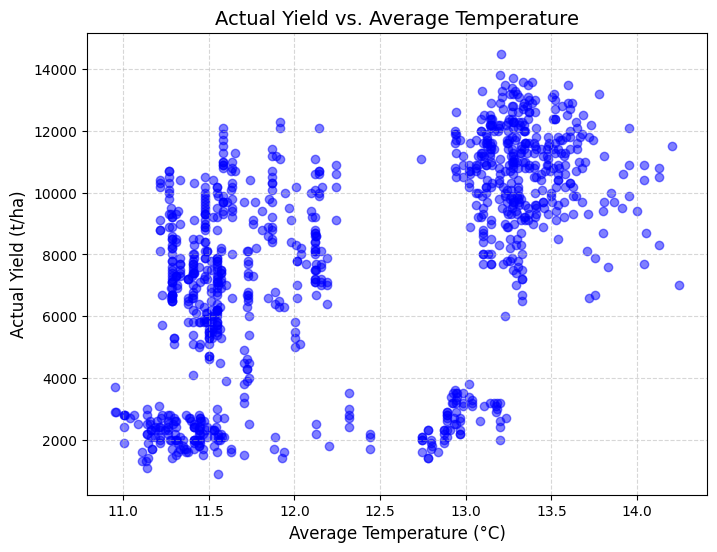

In [31]:
# 19
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(geodata['avg_temperature'], geodata['actual_yield'], color='green', alpha=0.5)
ax.set_xlabel('Average Temperature (°C)', fontsize=12)
ax.set_ylabel('Actual Yield (t/ha)', fontsize=12)
ax.set_title('Actual Yield vs. Average Temperature', fontsize=14)
ax.grid(ls='--', alpha=0.5)
plt.show()

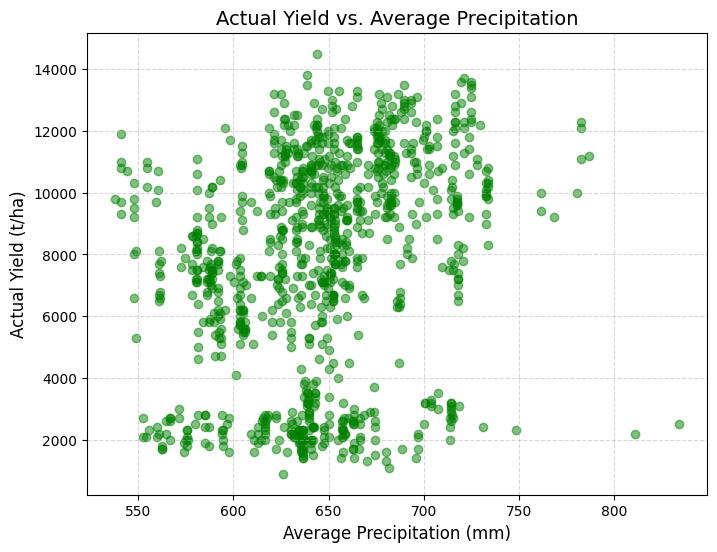

In [32]:
# 20
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(geodata['avg_rainfall'], geodata['actual_yield'], color='green', alpha=0.5)
ax.set_xlabel('Average Precipitation (mm)', fontsize=12)
ax.set_ylabel('Actual Yield (t/ha)', fontsize=12)
ax.set_title('Actual Yield vs. Average Precipitation', fontsize=14)
ax.grid(ls='--', alpha=0.5)
plt.show()

In [33]:
# 21
geodata.to_file('./datasets/updated_dataset.geojson.geojson', driver='GeoJSON')